In [5]:
import pandas as pd
import numpy as np

# Create sample MotoGP race and financial data
motoGP_data = {
    "Year": np.arange(2000, 2025),  # 2000'den 2024'e yıllar
    "Yamaha_Wins": np.random.randint(3, 15, size=25),  # Number of races won by Yamaha
    "Honda_Wins": np.random.randint(5, 20, size=25),  # Number of races won by Honda
    "Ducati_Wins": np.random.randint(1, 10, size=25),  # Number of races won by Ducati
    "Suzuki_Wins": np.random.randint(0, 8, size=25),  # Number of races won by Suzuki
}

financial_data = {
    "Brand": ["Yamaha", "Honda", "Ducati", "Suzuki"],
    "2024_H1_Revenue": np.random.randint(500, 2000, size=4),  # First 6 months turnover ($ million)
    "2024_H2_Revenue": np.random.randint(600, 2500, size=4),  # Last 6 months turnover ($ million)
}

# Create data frames
motoGP_df = pd.DataFrame(motoGP_data)
financial_df = pd.DataFrame(financial_data)

(motoGP_df, financial_df)

(    Year  Yamaha_Wins  Honda_Wins  Ducati_Wins  Suzuki_Wins
 0   2000            6           8            1            7
 1   2001           14           7            5            3
 2   2002           14           6            4            2
 3   2003           11          13            8            3
 4   2004            7           7            8            5
 5   2005            6           7            2            0
 6   2006           14           5            3            5
 7   2007           10           7            2            1
 8   2008            3           9            6            1
 9   2009            8           5            9            6
 10  2010           14           5            9            3
 11  2011            6           7            1            5
 12  2012            8           9            2            1
 13  2013           10           9            8            6
 14  2014            8          11            5            0
 15  2015            3  

In [11]:
# Convert MotoGP win data to long format
motoGP_long = motoGP_df.melt(id_vars=["Year"], 
                              value_vars=["Yamaha_Wins", "Honda_Wins", "Ducati_Wins", "Suzuki_Wins"],
                              var_name="Brand", value_name="Wins")
# Edit Brand names
motoGP_long["Brand"] = motoGP_long["Brand"].str.replace("_Wins", "")

# 2024 MotoGP performance
motoGP_2024 = motoGP_long[motoGP_long["Year"] == 2024].drop(columns=["Year"])

# Combining with financial data
merged_df = financial_df.merge(motoGP_2024, on="Brand")

# Calculate 2024 financial growth rate
merged_df["Growth (%)"] = ((merged_df["2024_H2_Revenue"] - merged_df["2024_H1_Revenue"]) / 
                           merged_df["2024_H1_Revenue"]) * 100

merged_df

Brand  2024_H1_Revenue  2024_H2_Revenue  Wins  Growth (%)
0  Yamaha             1052             1962     8   86.501901
1   Honda             1968              929    13  -52.794715
2  Ducati             1741             1969     9   13.095922
3  Suzuki             1598             2075     2   29.849812

C:\Users\user\AppData\Local\Temp\ipykernel_36152\4011724578.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x="Brand", y="Wins", palette="Blues_d")


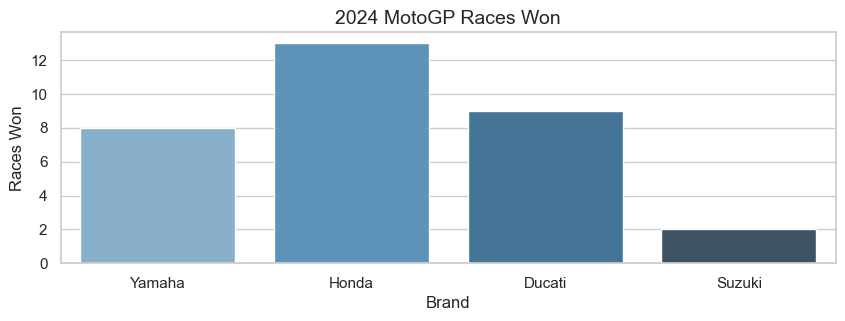

C:\Users\user\AppData\Local\Temp\ipykernel_36152\4011724578.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=merged_df, x="Brand", y="Growth (%)", palette="Greens_d")


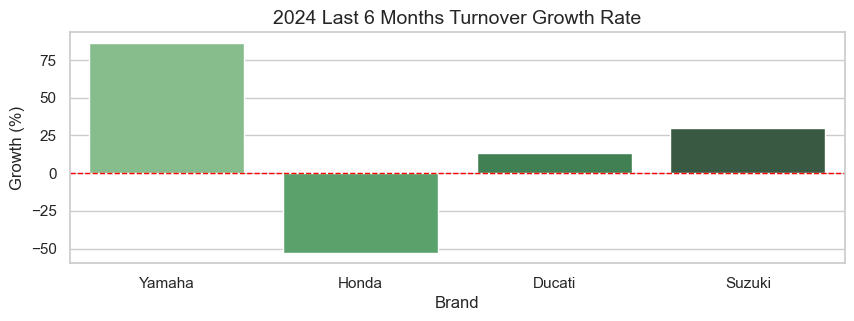

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#General settings for graphics
sns.set_theme(style="whitegrid")

# Bar graph Races won
plt.figure(figsize=(10, 3))
sns.barplot(data=merged_df, x="Brand", y="Wins", palette="Blues_d")
plt.title("2024 MotoGP Races Won", fontsize=14)
plt.ylabel("Races Won")
plt.xlabel("Brand")
plt.show()

# Bar chart 2024 Growth Rate
plt.figure(figsize=(10, 3))
sns.barplot(data=merged_df, x="Brand", y="Growth (%)", palette="Greens_d")
plt.title("2024 Last 6 Months Turnover Growth Rate", fontsize=14)
plt.ylabel("Growth (%)")
plt.xlabel("Brand")
plt.axhline(0, color="red", linestyle="--", linewidth=1)  # Line to show negative growth
plt.show()